<a href="https://colab.research.google.com/github/dsfdev2023/studentEvaluatiuon/blob/main/3_Absence_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load your dataset
file_path = '/content/drive/MyDrive/1HENRYS WORKFORCE/ABSENCE RECORDS.xlsx'  # Update with your file path
data = pd.read_excel(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Total Absences by Type**

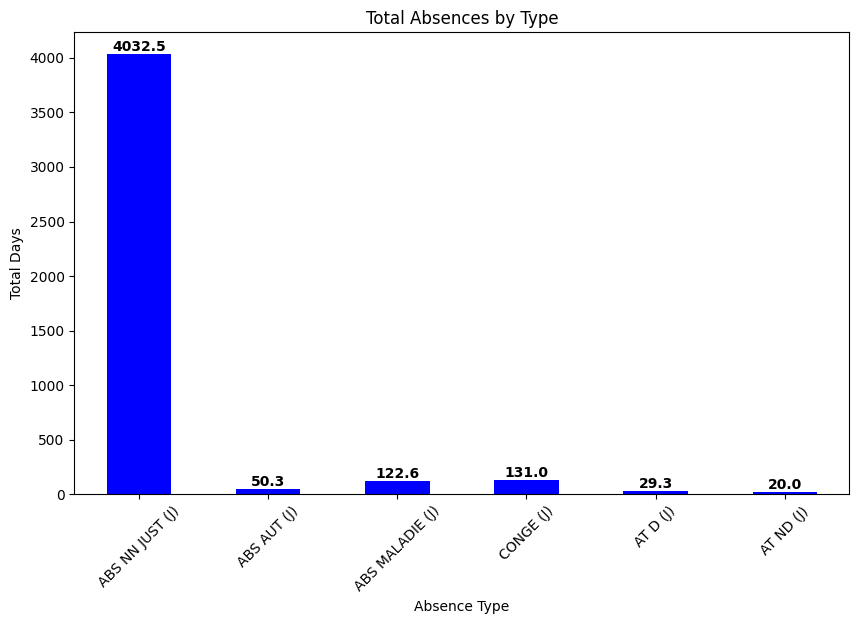

In [14]:
# Convert ',' to '.' for decimals and convert to float
data.replace(',', '.', regex=True, inplace=True)
for col in ['ABS NN JUST (J)', 'ABS AUT (J)', 'ABS MALADIE (J)', 'CONGE (J)', 'AT D (J)', 'AT ND (J)']:
    data[col] = data[col].astype(float)

# Calculate total absences
total_absences = data[['ABS NN JUST (J)', 'ABS AUT (J)', 'ABS MALADIE (J)', 'CONGE (J)', 'AT D (J)', 'AT ND (J)']].sum()

# Plotting
ax = total_absences.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Total Absences by Type')
plt.xlabel('Absence Type')
plt.ylabel('Total Days')
plt.xticks(rotation=45)

# Adding simple annotations above each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),
                ha='center', va='bottom',
                fontweight='bold')

plt.show()

# **2. Average Absences by Type per Employee**

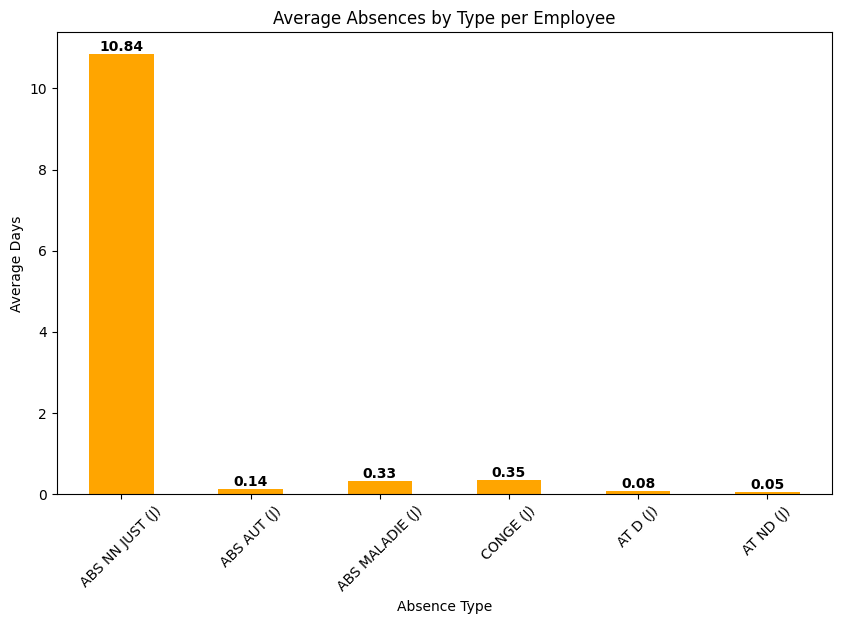

In [13]:
# Calculate average absences
avg_absences = data[['ABS NN JUST (J)', 'ABS AUT (J)', 'ABS MALADIE (J)', 'CONGE (J)', 'AT D (J)', 'AT ND (J)']].mean()

# Plotting
ax = avg_absences.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Absences by Type per Employee')
plt.xlabel('Absence Type')
plt.ylabel('Average Days')
plt.xticks(rotation=45)

# Adding bold annotations above each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontweight='bold')

plt.show()



# **TABLE OF EMPLOYEES WITH +4 DAYS ABS NN JUST**

In [16]:
# Filter the dataset for employees with more than 4 days of 'ABS NN JUST (J)'
filtered_data = data[data['ABS NN JUST (J)'] > 4]

# Select only 'Matricule' and 'ABS NN JUST (J)' columns
selected_columns = filtered_data[['Matricule', 'ABS NN JUST (J)']]

# Sort by 'ABS NN JUST (J)' in ascending order
sorted_data = selected_columns.sort_values(by='ABS NN JUST (J)')

# Display the sorted table in Google Colab
display(sorted_data)

# Save the sorted data to a new Excel file
sorted_file_path = '/content/drive/My Drive/sorted_dataset.xlsx'  # Update with your desired file path
sorted_data.to_excel(sorted_file_path, index=False)

# Code to download the file directly from Google Colab
from google.colab import files
files.download(sorted_file_path)


,Matricule,ABS NN JUST (J)
57,2363,4.5
358,7210,4.5
221,7014,4.5
283,7103,4.5
198,6985,4.5
...,...,...
201,6989,33.0
199,6987,33.0
147,6925,33.0
143,6921,33.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## TABLE EXCLUDING EMPLOYEES WITH 33 DAYS ABS NN JUST

In [19]:
# Filter the dataset for employees with more than 4 days and less than or equal to 30 days of 'ABS NN JUST (J)'
filtered_data = data[(data['ABS NN JUST (J)'] > 4) & (data['ABS NN JUST (J)'] <= 30)]

# Select only 'Matricule' and 'ABS NN JUST (J)' columns
selected_columns = filtered_data[['Matricule', 'ABS NN JUST (J)']]

# Sort by 'ABS NN JUST (J)' in ascending order
sorted_data = selected_columns.sort_values(by='ABS NN JUST (J)')

# Display the sorted table in Google Colab
display(sorted_data)

# Aggregate the values of 'ABS NN JUST (J)' for filtered data
total_abs_nn_just = filtered_data['ABS NN JUST (J)'].sum()
print("Total for 'ABS NN JUST (J)' in filtered data:", total_abs_nn_just)

# Count the total number of records (employees)
total_employees = len(filtered_data)
print("Total number of employees in filtered data:", total_employees)

# Save the sorted data to a new Excel file
sorted_file_path = '/content/drive/My Drive/sorted_filtered_dataset.xlsx'  # Update with your desired file path
sorted_data.to_excel(sorted_file_path, index=False)

# Code to download the file directly from Google Colab
from google.colab import files
files.download(sorted_file_path)

,Matricule,ABS NN JUST (J)
57,2363,4.5
297,7129,4.5
283,7103,4.5
358,7210,4.5
328,7170,4.5
339,7183,4.5
198,6985,4.5
221,7014,4.5
97,6676,4.5
251,7060,6.0


Total for 'ABS NN JUST (J)' in filtered data: 457.0
Total number of employees in filtered data: 39


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Total of 39 employees for 'ABS NN JUST (J)' in filtered data: 457 Days**

## **103 Employees with 33 'ABS NN JUST(J)'**

## **168 Employees out of 453 have 0 'ABS NN JUST(J)'**

# **3. Absence Distribution by Job Title (Fonction)**

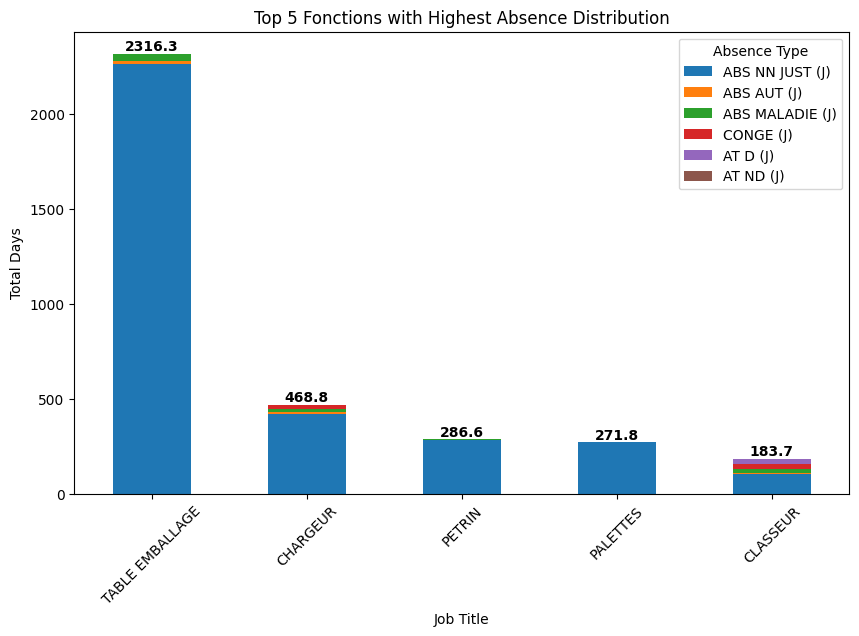

In [34]:
# Group by job title and sum absences
absence_by_job = data.groupby('Fonction')[['ABS NN JUST (J)', 'ABS AUT (J)', 'ABS MALADIE (J)', 'CONGE (J)', 'AT D (J)', 'AT ND (J)']].sum()

# Calculate the total absences for each job title
absence_by_job['Total Absences'] = absence_by_job.sum(axis=1)
top_5_fonctions = absence_by_job.sort_values('Total Absences', ascending=False).head(5)

# Plotting
ax = top_5_fonctions.drop(columns='Total Absences').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 5 Fonctions with Highest Absence Distribution')
plt.xlabel('Job Title')
plt.ylabel('Total Days')
plt.xticks(rotation=45)
plt.legend(title='Absence Type')

# Adding annotations for the total absences for each job title in the top 5
for i, total in enumerate(top_5_fonctions['Total Absences']):
    ax.text(i, total, f'{total:.1f}', ha='center', va='bottom', fontweight='bold')

plt.show()


# **4. Absence Distribution by Production Line (Ligne)**

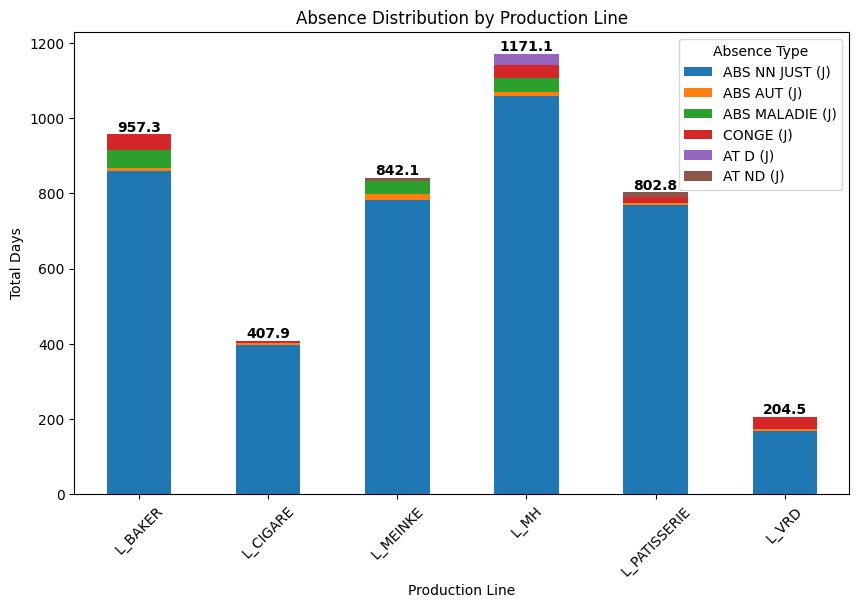

In [33]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Group by production line and sum absences
absence_by_line = data.groupby('Ligne')[['ABS NN JUST (J)', 'ABS AUT (J)', 'ABS MALADIE (J)', 'CONGE (J)', 'AT D (J)', 'AT ND (J)']].sum()

# Plotting
ax = absence_by_line.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Absence Distribution by Production Line')
plt.xlabel('Production Line')
plt.ylabel('Total Days')
plt.xticks(rotation=45)
plt.legend(title='Absence Type')

# Adding annotations for the total absences for each line
totals = absence_by_line.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total, f'{total:.1f}', ha='center', va='bottom', fontweight='bold')

plt.show()

